In [16]:
import qutip
import scipy.constants as csts
import numpy as np

import matplotlib.pyplot as plt

hbar = csts.hbar
pi = csts.pi

%matplotlib notebook

$$\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
## The Qobj class
Quantum objects such as kets, bras or operators are represented in qutip by the `qutip.Qobj` class. Many important QM objects are already implemented (basis vectors, Pauli matrices, ladder operators, ...). To get started, implement the following quantum objects in qutip. (Use tab-completion to get an overview of built-in types and allowed methods.)

1) Create the basis vectors $\ket{g} = (0, 1)^T$ and $\ket{e} = (1, 0)^T$.

In [17]:
e = qutip.basis(N=2, n=0)

e

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [18]:
g = qutip.basis(N=2, n=1)

g

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

2) Calculate the inner products $\bra{e}e\rangle$ and $\bra{e}g\rangle$.

In [19]:
e.dag()*e

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

In [20]:
g.dag()*g

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

3) Create the operator $\sigma_- = \ket{g}\bra{e}$. How does it act on $\ket{g}$ and $\ket{e}$.

In [21]:
sigmam = qutip.sigmam()

In [22]:
sigmam*g

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [0.]]

In [23]:
sigmam*e

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

4) Verify the property of the Pauli matrices
$$\sigma_x^2 = \sigma_y^2 = \sigma_z^2 = -i\sigma_x \sigma_y \sigma_z = \begin{pmatrix} 1&0\\0&1\end{pmatrix} = I$$

In [24]:
qutip.sigmax()**2

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

In [25]:
-1j * qutip.sigmax()*qutip.sigmay()* qutip.sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

# Rabi Oscillations
In the last lecture you have derived the Hamiltonian for a two level system that is driven by a classical electromagnetic wave. Including detuning, the Hamiltonian for this system is

$$ H_{semiclassical} = \frac{\hbar}{2} \left(\begin{array}{cc} -2\delta & \Omega \\ \Omega & 0 \end{array}\right),$$

given in the eigenstate basis of the unperturbed atom $\ket{g} = (0, 1)^T$ and $\ket{e} = (1, 0)^T$. Here $\delta = \omega_L - \omega_0$ is the detuning of the driving field with respect to the atomic transition and $\Omega$ is the on-resonance Rabi frequency.


In this tutorial we will numerically simulate the time evolution of this system, using the QUantum Toolbox In Python (`qutip`).


## Time evolution

In `qutip` the unitary time evolution of an initial state `psi0` under a Hamiltonian `H` can be computed by
```
    qutip.mesolve(H, psi0, timesteps, c_ops, e_ops)
```
where `timesteps` is an array of times for which the state of the system should be returned, `c_ops` is a list of collapse operators that describe coupling to the surroundings (i.e. an empty list for unitary time evolution) and `e_ops` is a list that can contain operators for which the expectation value at each timestep should be stored as well.

### Exercise 1
a) Simulate the time evolution $\ket{\Psi(t)}$ of an initial state $\ket{g}$ driven by a field with Rabi frequency $\Omega= 100kHz$ and detuning $\delta=0$ for two full Rabi cycles. Plot the probability of finding the system in the excited state $\left|\braket{e}{\Psi(t)}\right|^2$ as a function of time. (You can set $\hbar=1$.)

In [26]:
oR = 100e3
delta = 0

def rabi_pe(oR, delta, T=2):

    H = qutip.Qobj([[-delta, oR/2],[oR/2, 0]])

    timesteps = 2*pi*np.arange(0, T, 0.02)/oR

    Pe = e * e.dag()
    
    # in order to store states AND expectation vals, an option object needs
    # to be passed additionally to mesolve
    opt = qutip.solver.Options(store_states=True)
    result = qutip.mesolve(H, g, timesteps, [], [Pe], options=opt)
    
    return timesteps, result.expect[0], result.states

<IPython.core.display.Javascript object>


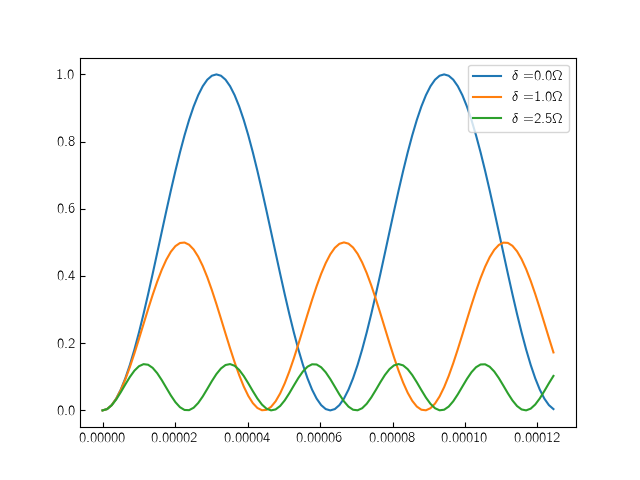

$\delta$ =0.0$\Omega$
$\delta$ =1.0$\Omega$
$\delta$ =2.5$\Omega$


In [35]:
timesteps, pe, result = rabi_pe(oR, delta, T=2)

fig, axe = plt.subplots()

time_evolutions = []

for d in [0, oR, 2.5*oR]:
    label = r'$\delta$ =' + '{:.1f}'.format(d/oR) + '$\Omega$'
    print(label)
    timesteps, pe, states = rabi_pe(oR, d, T=2)
    time_evolutions.append(states)
    axe.plot(timesteps, pe, label=label)
    
axe.legend(loc='upper right')

b) As in a) but now for different nonzero detunings of $\delta=\Omega$ and $\delta=2.5 \Omega$.

In [28]:
# see above

c) **BONUS**: Visualize the time evolutions obtained in a) and b) on the Bloch sphere, using `qutip.Bloch()`.

<IPython.core.display.Javascript object>


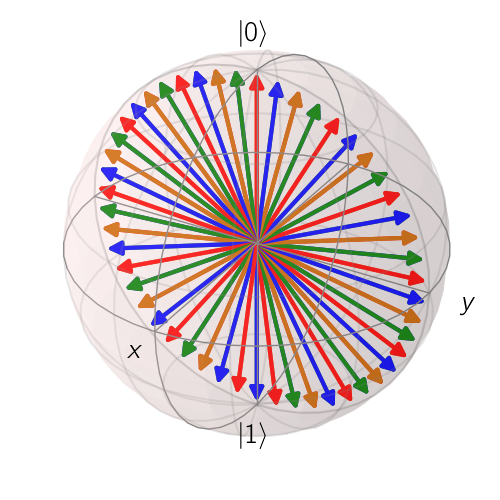

<IPython.core.display.Javascript object>


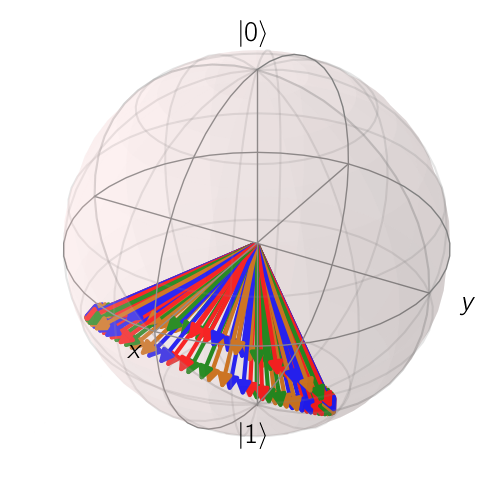

<IPython.core.display.Javascript object>


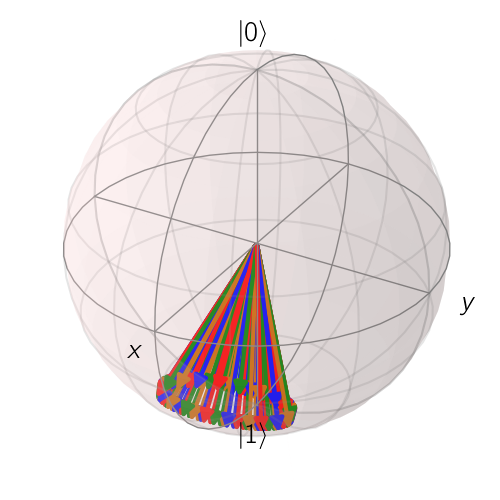

In [36]:
for r in time_evolutions:
    b = qutip.Bloch()
    b.add_states(r)
    b.show()

<IPython.core.display.Javascript object>


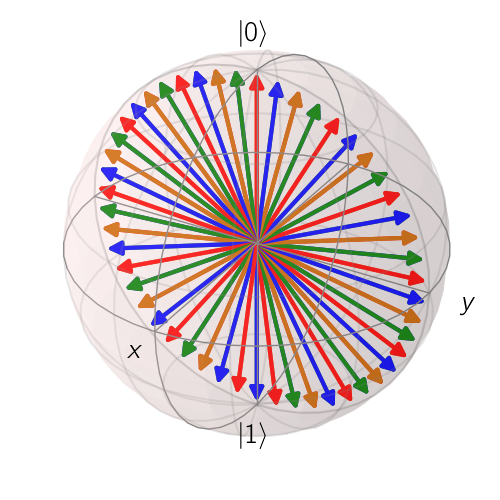

<IPython.core.display.Javascript object>


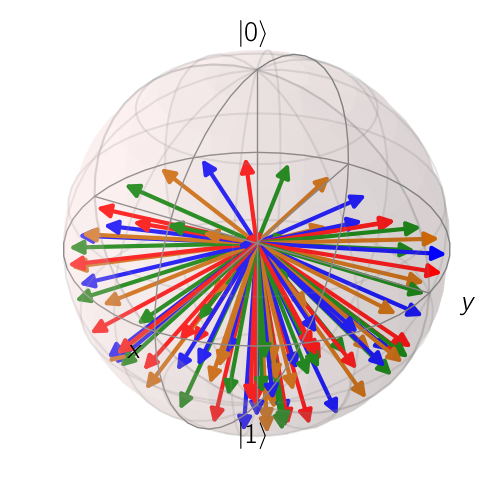

<IPython.core.display.Javascript object>


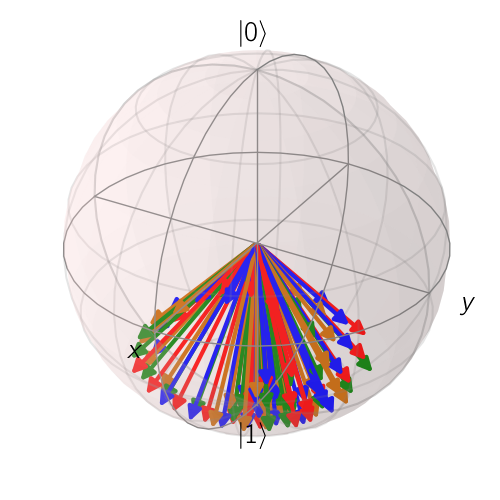

In [38]:
deltas = [0, oR, 2.5*oR]

for i, r in enumerate(time_evolutions):
    b = qutip.Bloch()
    d = deltas[i]
    transformedstates = []
    for j, t in enumerate(timesteps):
        U_d = qutip.Qobj([[np.exp(1j*d*t), 0], [0, 1]])
        transformedstates.append(U_d * r[j])
    b.add_states(transformedstates)
    b.show()